In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("6. my_dataset.csv")
df.head(2)

Primary Key  Index        ASIN Model Number Manufacturer Name Generic Name  \
0            0      6  B0DZDC247V    MW0Y3HN/A             Apple  MacBook Air   
1            1     12  B0DZDC247V    MW0Y3HN/A             Apple  MacBook Air   

                                       Product Title  Price  Overall Rating  \
0  Apple 2025 MacBook Air (13-inch, Apple M4 chip...  89990             4.5   
1  Apple 2025 MacBook Air (13-inch, Apple M4 chip...  89990             4.5   

   Rating Count  ...                                Cleaned Review Text  \
0            33  ...                       battery life is only 6 hours   
1            33  ...  i am planning to but this model but i am seein...   

                                             llm_raw  \
0  Based on the given examples and rules, here's ...   
1  Based on the review content, here's the output...   

                                          llm_parsed Sentiment  \
0  {'Sentiment': 'Negative', 'Aspect-PainPoint Pa...  Negative   
1  {'Sentiment': 'Neutral', 'Aspect-PainPoint Pai...   Neutral   

            Aspect-PainPoint Pairs  Standardized Aspect-PainPoint Pairs  \
0      Battery - Short backup time          Battery - Short backup time   
1  Processor - Low speed (0.01mhz)         Processor - Slow performance   

         Original Aspect-PainPoint          Standardized Category  \
0      Battery - Short backup time  Battery - Poor Battery Backup   
1  Processor - Low speed (0.01mhz)   Processor - Slow Performance   

  Standardized Aspect  Standardized Pain Point  
0             Battery      Poor Battery Backup  
1           Processor         Slow Performance  

[2 rows x 32 columns]

## Data Preprocessing

### Removed Unwanted column

In [5]:
df.drop(['Standardized Aspect-PainPoint Pairs', 'Original Aspect-PainPoint', 'Generic Name', "Aspect-PainPoint Pairs", 'Index', 'llm_raw', 'llm_parsed', 'Customer Say', 'Insight', 'Review Text'], 
        axis=1, inplace=True)

In [6]:
df.isnull().sum()

Primary Key                   0
ASIN                          0
Model Number                  0
Manufacturer Name             0
Product Title                 0
Price                         0
Overall Rating                0
Rating Count                  0
Review Count                  0
Bought L Month             1251
Product Link                  0
Individual Rating             1
Review Title                  0
Review Date                   0
Product Description         641
Verified Purchase             0
Helpful Votes                 0
Cleaned Review Text           0
Sentiment                     3
Standardized Category         0
Standardized Aspect           1
Standardized Pain Point       2
dtype: int64

In [7]:
df.shape

(3778, 22)

In [8]:
df.dropna(subset=['Standardized Aspect', 'Individual Rating'], inplace=True)

In [9]:
df.isnull().sum()

Primary Key                   0
ASIN                          0
Model Number                  0
Manufacturer Name             0
Product Title                 0
Price                         0
Overall Rating                0
Rating Count                  0
Review Count                  0
Bought L Month             1250
Product Link                  0
Individual Rating             0
Review Title                  0
Review Date                   0
Product Description         640
Verified Purchase             0
Helpful Votes                 0
Cleaned Review Text           0
Sentiment                     3
Standardized Category         0
Standardized Aspect           0
Standardized Pain Point       1
dtype: int64

In [10]:
df.shape

(3776, 22)

In [11]:
df.columns

Index(['Primary Key', 'ASIN', 'Model Number', 'Manufacturer Name',
       'Product Title', 'Price', 'Overall Rating', 'Rating Count',
       'Review Count', 'Bought L Month', 'Product Link', 'Individual Rating',
       'Review Title', 'Review Date', 'Product Description',
       'Verified Purchase', 'Helpful Votes', 'Cleaned Review Text',
       'Sentiment', 'Standardized Category', 'Standardized Aspect',
       'Standardized Pain Point'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3776 entries, 0 to 3777
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Primary Key              3776 non-null   int64  
 1   ASIN                     3776 non-null   object 
 2   Model Number             3776 non-null   object 
 3   Manufacturer Name        3776 non-null   object 
 4   Product Title            3776 non-null   object 
 5   Price                    3776 non-null   int64  
 6   Overall Rating           3776 non-null   float64
 7   Rating Count             3776 non-null   int64  
 8   Review Count             3776 non-null   int64  
 9   Bought L Month           2526 non-null   object 
 10  Product Link             3776 non-null   object 
 11  Individual Rating        3776 non-null   float64
 12  Review Title             3776 non-null   object 
 13  Review Date              3776 non-null   object 
 14  Product Description      3136

In [13]:
df['Primary Key'] = df['Primary Key'].astype(dtype='str')

In [14]:
df['Review Date'].head()

0      Reviewed in India on 30 March 2025
1         Reviewed in India on 8 May 2025
2    Reviewed in India on 18 October 2024
3    Reviewed in India on 18 October 2024
4    Reviewed in India on 18 October 2024
Name: Review Date, dtype: object

In [15]:
df['Review Date'].str.split(" on ").head()

0      [Reviewed in India, 30 March 2025]
1         [Reviewed in India, 8 May 2025]
2    [Reviewed in India, 18 October 2024]
3    [Reviewed in India, 18 October 2024]
4    [Reviewed in India, 18 October 2024]
Name: Review Date, dtype: object

In [16]:
def func(text):
    text = text.split(" on ")[-1].strip()
    return text

df['Review_Date'] = df['Review Date'].apply(func)
df['Review_Date'].head()

0      30 March 2025
1         8 May 2025
2    18 October 2024
3    18 October 2024
4    18 October 2024
Name: Review_Date, dtype: object

In [17]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df['Review_Date'].head()

0   2025-03-30
1   2025-05-08
2   2024-10-18
3   2024-10-18
4   2024-10-18
Name: Review_Date, dtype: datetime64[ns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3776 entries, 0 to 3777
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Primary Key              3776 non-null   object        
 1   ASIN                     3776 non-null   object        
 2   Model Number             3776 non-null   object        
 3   Manufacturer Name        3776 non-null   object        
 4   Product Title            3776 non-null   object        
 5   Price                    3776 non-null   int64         
 6   Overall Rating           3776 non-null   float64       
 7   Rating Count             3776 non-null   int64         
 8   Review Count             3776 non-null   int64         
 9   Bought L Month           2526 non-null   object        
 10  Product Link             3776 non-null   object        
 11  Individual Rating        3776 non-null   float64       
 12  Review Title             3776 non-null 

In [19]:
df.columns

Index(['Primary Key', 'ASIN', 'Model Number', 'Manufacturer Name',
       'Product Title', 'Price', 'Overall Rating', 'Rating Count',
       'Review Count', 'Bought L Month', 'Product Link', 'Individual Rating',
       'Review Title', 'Review Date', 'Product Description',
       'Verified Purchase', 'Helpful Votes', 'Cleaned Review Text',
       'Sentiment', 'Standardized Category', 'Standardized Aspect',
       'Standardized Pain Point', 'Review_Date'],
      dtype='object')

## Normalize Database

In [21]:
review_df = df[[
    'Primary Key',
    'ASIN',
    'Individual Rating',
    'Review Title',
    'Review Date',
    'Review_Date',
    'Verified Purchase',
    'Helpful Votes',
    'Cleaned Review Text',
    'Sentiment',
    'Standardized Category',
    'Standardized Aspect',
    'Standardized Pain Point'
]].copy()


In [22]:
review_df.head(2)

Primary Key        ASIN  Individual Rating               Review Title  \
0           0  B0DZDC247V                1.0               Battery life   
1           1  B0DZDC247V                5.0  Prosessor Speed is good ?   

                          Review Date Review_Date  Verified Purchase  \
0  Reviewed in India on 30 March 2025  2025-03-30               True   
1     Reviewed in India on 8 May 2025  2025-05-08              False   

   Helpful Votes                                Cleaned Review Text Sentiment  \
0             35                       battery life is only 6 hours  Negative   
1             10  i am planning to but this model but i am seein...   Neutral   

           Standardized Category Standardized Aspect Standardized Pain Point  
0  Battery - Poor Battery Backup             Battery     Poor Battery Backup  
1   Processor - Slow Performance           Processor        Slow Performance

In [23]:
product_df = df.groupby('ASIN').agg({
    'Model Number': 'first',
    'Manufacturer Name': 'first',
    'Product Title': 'first',
    'Price': 'first',
    'Overall Rating': 'first',
    'Rating Count': 'first',
    'Review Count': 'first',
    'Bought L Month': 'first',
    'Product Link': 'first',
    'Product Description': 'first'
}).reset_index()


In [24]:
product_df.head(2)

ASIN Model Number Manufacturer Name  \
0  B08KQK6WWZ   82C500QVSP            Lenovo   
1  B08N5W4NNB    MGN63HN/A             Apple   

                                       Product Title  Price  Overall Rating  \
0  Lenovo V15 15.6'' FHD Laptop, 12th Gen Intel C...  42990             3.2   
1  Apple MacBook Air Laptop: Apple M1 chip, 13.3-...  54990             4.6   

   Rating Count  Review Count Bought L Month  \
0             7             4           None   
1          7004          1500            3K+   

                                        Product Link  \
0  https://www.amazon.in/Lenovo-i5-1235U-Graphics...   
1  https://www.amazon.in/Apple-MacBook-Chip-13-in...   

               Product Description  
0                             None  
1  Colour: Space Grey|Size: 256 GB

In [25]:
# review_df.to_csv('customer-sentiment.csv', index=False)
# product_df.to_csv("product-centric.csv", index=False)

## 🔍 General Product Insights

### Total Number of Unique Products

In [28]:
product_df['ASIN'].nunique()

154

### Total Number of Unique Brands

In [30]:
product_df['Manufacturer Name'].nunique()

5

In [31]:
product_df['Manufacturer Name'].unique()

array(['Lenovo', 'Apple', 'HP', 'Dell', 'MSI'], dtype=object)

In [32]:
product_df['Manufacturer Name'].value_counts()

Manufacturer Name
Lenovo    61
HP        49
Dell      17
Apple     14
MSI       13
Name: count, dtype: int64

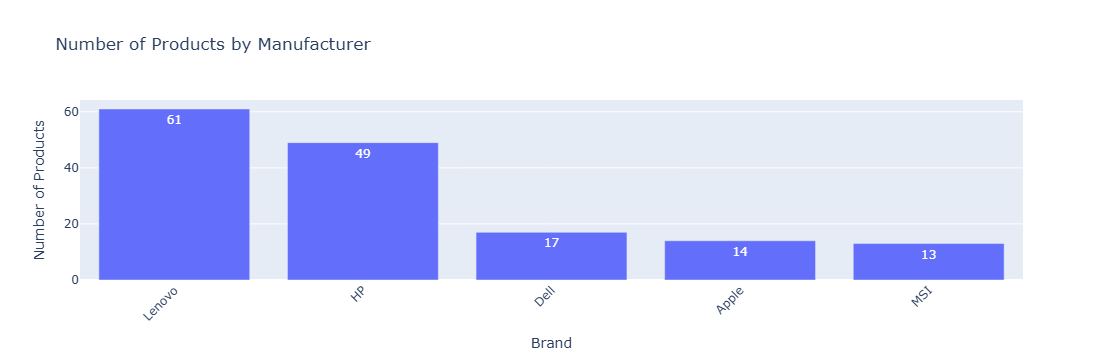

In [33]:
brand_counts = product_df['Manufacturer Name'].value_counts().reset_index()
brand_counts.columns = ['Manufacturer Name', 'Count']

fig = px.bar(brand_counts, x='Manufacturer Name', y='Count',
             title='Number of Products by Manufacturer',
             labels={'Count': 'Number of Products', 'Manufacturer Name': 'Brand'},
             text='Count')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

### 🏷️ Insight: Laptop Brand Distribution

The dataset is dominated by a few key manufacturers. **Lenovo** leads with **61 products**, followed by **HP**. These two brands together account for the vast majority of laptops.

> This suggests Lenovo and HP are the most prevalent brands in the dataset, possibly due to their wide range of models across different price segments.


### Distribution of Laptops by Price Range

In [36]:
product_df['Price'].min(), product_df['Price'].max()

(13990, 474490)

In [37]:
price_bins = [0, 30000, 50000, 70000, 100000, 150000, 200000, 300000, 500000]
price_labels = ['<30k', '30k–50k', '50k–70k', '70k–1L', '1L–1.5L', '1.5L–2L', '2L–3L', '>3L']

product_df['Price Range'] = pd.cut(product_df['Price'], bins=price_bins, labels=price_labels, right=False)

product_df['Price Range'].value_counts()


Price Range
30k–50k    45
50k–70k    34
<30k       23
70k–1L     22
1L–1.5L    13
>3L         7
1.5L–2L     6
2L–3L       4
Name: count, dtype: int64

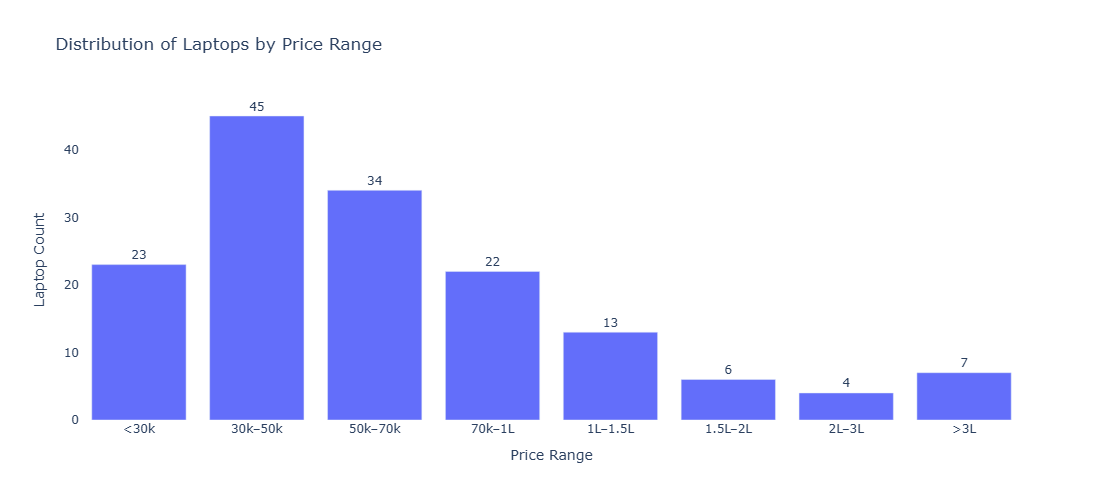

In [38]:
price_range_counts = product_df['Price Range'].value_counts().sort_index().reset_index()
price_range_counts.columns = ['Price Range', 'Count']

fig = px.bar(price_range_counts, x='Price Range', y='Count',
             title='Distribution of Laptops by Price Range',
             labels={'Count': 'Number of Laptops', 'Price Range': 'Price Bracket'},
             text='Count')

fig.update_layout(xaxis_title='Price Range', yaxis_title='Laptop Count', plot_bgcolor='white', width=800, 
    height=500)
fig.update_traces(textposition='outside')

fig.show()

### 💡 Insight: Laptop Price Distribution

The majority of laptops are priced in the **₹30,000–₹50,000** range, with **45 products**, and **₹50,000–₹70,000** range, with **34 products** making it the most common price bracket in the dataset. This highlights a strong focus on mid-range laptops.


### Distribution of Laptops by Rating Range

In [41]:
product_df['Overall Rating'].min(), product_df['Overall Rating'].max()

(1.5, 5.0)

In [42]:
rating_bins = [1.4, 2.2, 2.9, 3.6, 4.3, 5.0]
rating_labels = ['Very Poor (1.4–2.2)', 'Poor (2.2–2.9)', 'Average (2.9–3.6)', 'Good (3.6–4.3)', 'Excellent (4.3–5.0)']

product_df['Rating Range'] = pd.cut(product_df['Overall Rating'], bins=rating_bins, labels=rating_labels)
product_df['Rating Range'].value_counts()

Rating Range
Good (3.6–4.3)         86
Average (2.9–3.6)      38
Excellent (4.3–5.0)    17
Poor (2.2–2.9)          9
Very Poor (1.4–2.2)     4
Name: count, dtype: int64

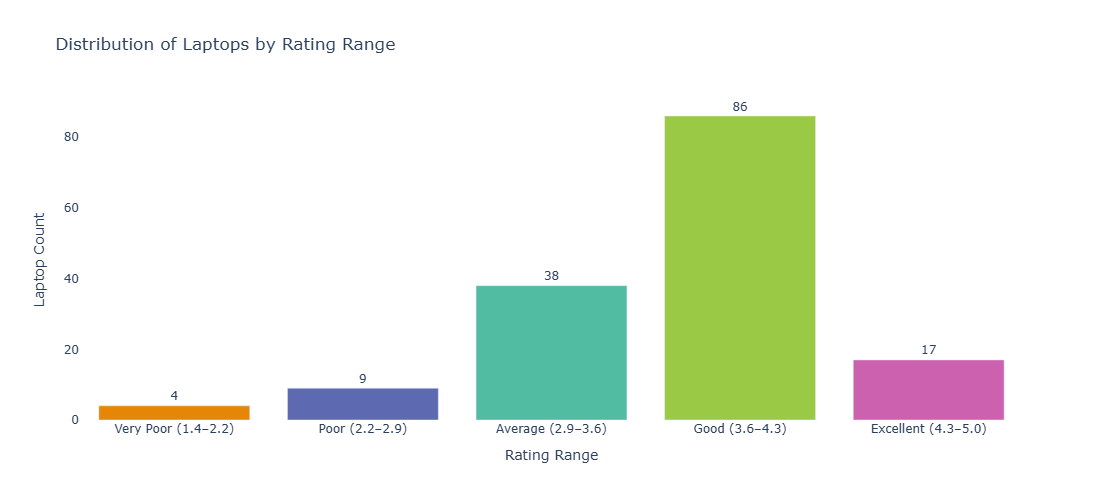

In [43]:
rating_range_counts = product_df['Rating Range'].value_counts().sort_index().reset_index()
rating_range_counts.columns = ['Rating Range', 'Count']

fig = px.bar(rating_range_counts, x='Rating Range', y='Count',
             title='Distribution of Laptops by Rating Range',
             labels={'Count': 'Number of Laptops', 'Rating Range': 'Rating Bracket'},
             text='Count',
             color='Rating Range',
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    xaxis_title='Rating Range',
    yaxis_title='Laptop Count',
    plot_bgcolor='white',
    showlegend=False,
    width=800, 
    height=500
)

fig.update_traces(textposition='outside')

fig.show()

### ⭐ Insight: Laptop Rating Distribution
The majority of laptops fall in the “Good” rating bracket (3.6–4.3), with 86 products, suggesting that most laptops in the dataset are well-received by customers. Meanwhile, only 17 laptops have “Excellent” ratings (4.3–5.0), indicating fewer products are rated near perfect. Very few laptops fall into the “Poor” (2.2–2.9) or “Very Poor” (1.5–2.2) categories, reflecting an overall positive sentiment in customer feedback.

### 💻 Average Laptop Price vs Rating by Manufacturer

In [46]:
manufacturer_stats = product_df.groupby(['Manufacturer Name']).agg(
    Avg_Price=('Price', 'mean'),
    Avg_Rating=('Overall Rating', 'mean')
).reset_index()

manufacturer_stats = manufacturer_stats.round(2)
manufacturer_stats

Manufacturer Name  Avg_Price  Avg_Rating
0             Apple  145990.00        4.26
1              Dell  124710.41        3.67
2                HP   52694.57        3.63
3            Lenovo   61425.57        3.80
4               MSI  159570.00        3.68

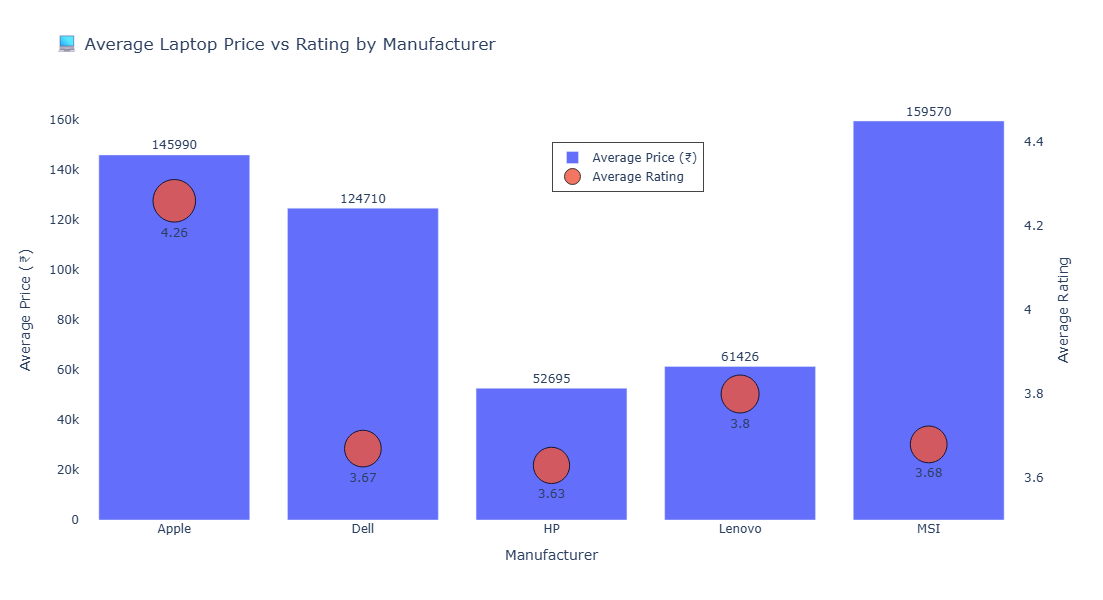

In [47]:

manufacturers = manufacturer_stats['Manufacturer Name']
avg_price = manufacturer_stats['Avg_Price']
avg_rating = manufacturer_stats['Avg_Rating']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=manufacturers,
    y=avg_price,
    name='Average Price (₹)',
    marker_color='#636EFA',
    text=avg_price.round(0),
    textposition='outside',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=manufacturers,
    y=avg_rating,
    name='Average Rating',
    mode='markers+text',
    marker=dict(
        size=avg_rating * 10,
        color='#EF553B',
        line=dict(width=1, color='black'),
        opacity=0.8
    ),
    text=avg_rating.round(2),
    textposition='bottom center',
    yaxis='y2'
))

fig.update_layout(
    title='💻 Average Laptop Price vs Rating by Manufacturer',
    xaxis=dict(title='Manufacturer'),
    yaxis=dict(title='Average Price (₹)', side='left'),
    yaxis2=dict(title='Average Rating', overlaying='y', side='right', range=[3.5, 4.5]),
    barmode='group',
    height=600,
    plot_bgcolor='white',
    legend=dict(x=0.50, y=0.90, borderwidth=1),
)

fig.show()


### 📊 Insight: Average Price vs Rating by Manufacturer
Apple commands a premium price (~₹1.46L) and delivers the highest average rating (4.26), reflecting strong customer satisfaction.

MSI is the most expensive brand (~₹1.60L) but has only a moderate rating (3.68), suggesting less favorable value perception.

Lenovo strikes a balance with a moderate price (~₹61K) and a decent rating (3.80), making it a value-for-money choice.

HP offers budget-friendly options (~₹53K) but has the lowest rating (3.63) among the group.

Dell, despite its high average price (~₹1.24L), scores just 3.67 in ratings, which may indicate customer dissatisfaction relative to price.

### Manufacturer-wise Averages: Rating Count, Review Count & Overall Rating

In [50]:
grouped_df = product_df.groupby(['Manufacturer Name']).agg(
    Avg_rating=('Rating Count', 'mean'),
    Avg_review=('Review Count', 'mean'),
    Overall_rating=('Overall Rating', 'mean')
).reset_index()

grouped_df = grouped_df.round(2)
grouped_df

Manufacturer Name  Avg_rating  Avg_review  Overall_rating
0             Apple      518.29      114.93            4.26
1              Dell      182.06       57.29            3.67
2                HP      213.59       54.39            3.63
3            Lenovo      153.61       43.89            3.80
4               MSI       13.23        8.08            3.68

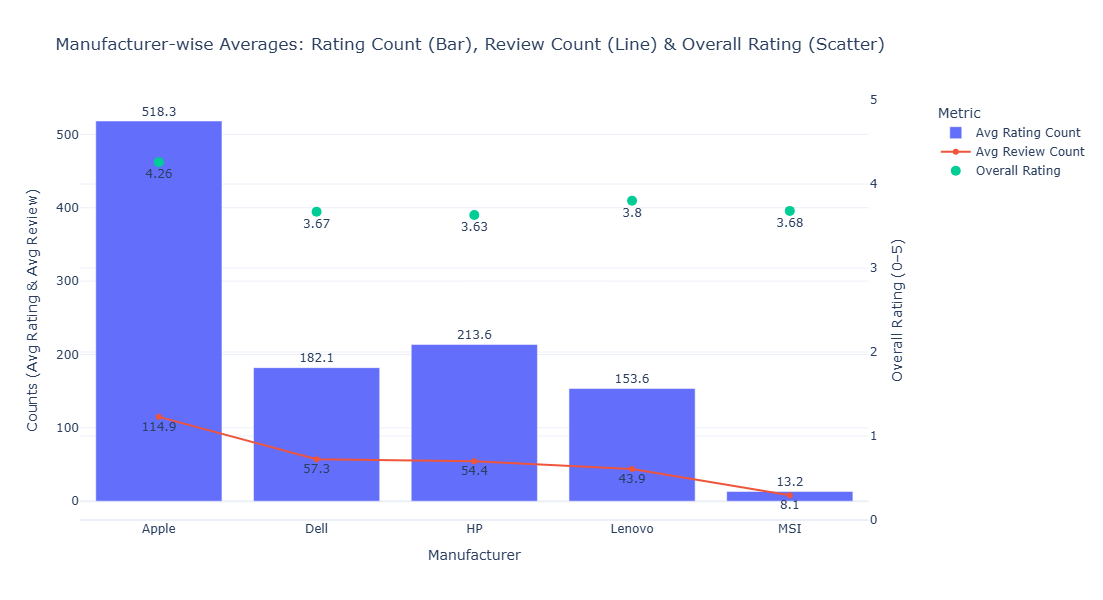

In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=grouped_df['Manufacturer Name'],
        y=grouped_df['Avg_rating'],
        name='Avg Rating Count',
        text=grouped_df['Avg_rating'].round(1),
        textposition='outside'
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=grouped_df['Manufacturer Name'],
        y=grouped_df['Avg_review'],
        mode='lines+markers+text',
        name='Avg Review Count',
        text=grouped_df['Avg_review'].round(1),
        textposition='bottom center'
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=grouped_df['Manufacturer Name'],
        y=grouped_df['Overall_rating'],
        mode='markers+text',
        marker=dict(size=10),
        name='Overall Rating',
        text=grouped_df['Overall_rating'].round(2),
        textposition='bottom center'
    ),
    secondary_y=True
)

fig.update_layout(
    title='Manufacturer-wise Averages: Rating Count (Bar), Review Count (Line) & Overall Rating (Scatter)',
    barmode='group',
    template='plotly_white',
    legend_title_text='Metric',
    height=600
)

fig.update_xaxes(title_text='Manufacturer')
fig.update_yaxes(title_text='Counts (Avg Rating & Avg Review)', secondary_y=False)
fig.update_yaxes(title_text='Overall Rating (0–5)', range=[0, 5], secondary_y=True)

fig.show()


## 🔍 Insights from Manufacturer-wise Review and Rating Analysis

### 📈 Apple dominates across all metrics:
- It has the **highest average rating count** (**518**) and **review count** (**115**), indicating high customer engagement.
- It also maintains a **strong overall rating of 4.26**, suggesting both popularity and customer satisfaction.

### ⚖️ HP, Dell, and Lenovo show moderate engagement:
- **HP** and **Dell** have **decent average rating and review counts**, but their **overall ratings are slightly lower** (~3.63–3.67), indicating mixed customer experiences.
- **Lenovo** has **slightly lower engagement** than HP and Dell but a **better overall rating (~3.8)**, which may suggest a smaller yet more satisfied customer base.

### 🧩 MSI struggles in reach and perception:
- With the **lowest average rating (13)** and **review counts (8)**, **MSI products appear less popular**, indicating very low customer engagement.


### Price Range Analysis: Avg Price vs Avg Rating vs Product Total Ratings

In [54]:
manufacturer_stats = product_df.groupby(['Price Range']).agg(
    Avg_Price=('Price', 'mean'),
    Avg_Rating=('Overall Rating', 'mean'),
    prod_cnt=('ASIN', 'count'),
    total_rating=('Rating Count', 'sum'),
    total_review=('Review Count', 'sum')
).reset_index()

manufacturer_stats = manufacturer_stats.round(2)
manufacturer_stats

Price Range  Avg_Price  Avg_Rating  prod_cnt  total_rating  total_review
0        <30k   25158.48        3.52        23          3242           888
1     30k–50k   39406.73        3.70        45         13037          3220
2     50k–70k   60583.15        3.75        34         11613          2947
3      70k–1L   83918.64        3.94        22          1774           661
4     1L–1.5L  123633.77        4.28        13           590           224
5     1.5L–2L  183158.33        3.88         6            22            16
6       2L–3L  253045.00        4.25         4            33            28
7         >3L  370141.00        3.14         7            48            46

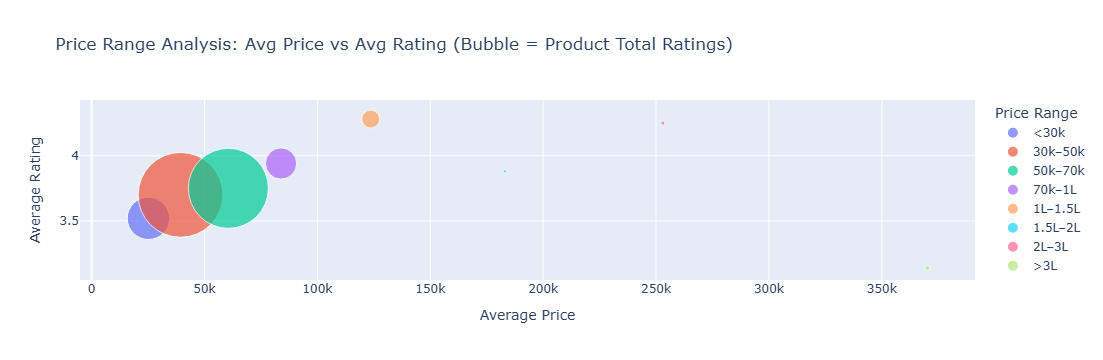

In [55]:
fig = px.scatter(
    manufacturer_stats,
    x='Avg_Price',
    y='Avg_Rating',
    size='total_rating',
    color='Price Range',
    hover_name='Price Range',
    size_max=60,
    title='Price Range Analysis: Avg Price vs Avg Rating (Bubble = Product Total Ratings)',
    labels={'Avg_Price': 'Average Price', 'Avg_Rating': 'Average Rating'}
)

fig.show()

## 🧠 Analyst-Level Insights on the "Manufacturer Stats" Table

### ✅ 1. Mid-Range Price Segments (₹30k–₹70k) are the Power Zones

- ~60% of products fall in this range (**79 out of total 154**).
- They command **~80% of total ratings** (**24,650 out of 29,366**), meaning most customer engagement is here.
- Average rating is **3.7–3.75**, indicating acceptable satisfaction despite large volume.

### 🧩 Implication:
For a **manufacturer**, this is the **most competitive and rewarding** space.  
**Launching a product** in this space has high chances of engagement and success.


### Avg Rating vs Total Ratings Count across Price Segments

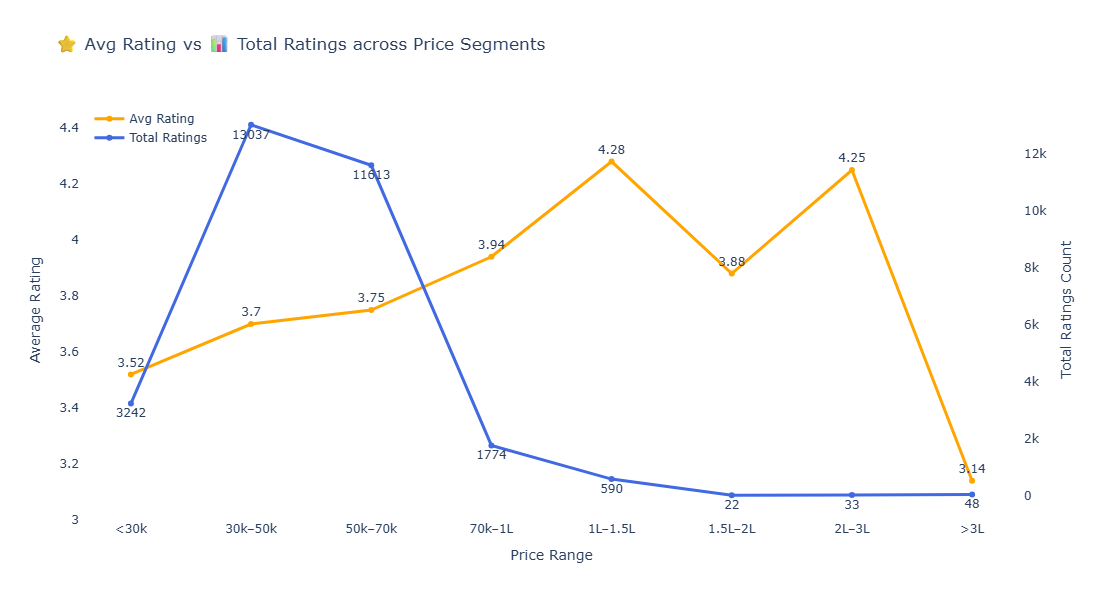

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=manufacturer_stats['Price Range'],
    y=manufacturer_stats['Avg_Rating'],
    mode='lines+markers+text',
    name='Avg Rating',
    line=dict(color='orange', width=3),
    text=manufacturer_stats['Avg_Rating'].round(2),
    textposition='top center',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=manufacturer_stats['Price Range'],
    y=manufacturer_stats['total_rating'],
    mode='lines+markers+text',
    name='Total Ratings',
    line=dict(color='royalblue', width=3),
    text=manufacturer_stats['total_rating'],
    textposition='bottom center',
    yaxis='y2'
))

fig.update_layout(
    title='⭐ Avg Rating vs 📊 Total Ratings across Price Segments',
    xaxis=dict(title='Price Range'),
    yaxis=dict(title='Average Rating', side='left', range=[3, 4.5]),
    yaxis2=dict(
        title='Total Ratings Count',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    plot_bgcolor='white',
    legend=dict(x=0.01, y=0.99),
    height=600
)

fig.show()

### Higher Price Correlates with Higher Customer Satisfaction (Up to a Point)

- As the **average price increases**, the **average rating also improves**, suggesting a positive price-quality perception.
- For example:
  - ₹25K segment (<30k): ⭐ 3.52
  - ₹39K segment (30k–50k): ⭐ 3.70
  - ₹60K segment (50k–70k): ⭐ 3.75
  - ₹84K segment (70k–1L): ⭐ 3.94
  - ₹1.2L segment (1L–1.5L): ⭐ 4.28 ← **Highest rating**
  - However, customer engagement (total ratings) drops sharply after ₹70k, despite the improved product experience.
 


- However, after ₹1.5L, ratings fluctuate and **decline**:
  - ₹1.8L: ⭐ 3.88
  - ₹2.5L: ⭐ 4.25
  - ₹3.7L+: ⭐ 3.14 ← **Lowest among premium**

### 🧩 Implication:
- **Up to ₹1.5L**, higher price appears justified by better product quality and customer satisfaction.
- Beyond ₹1.5L, niche or luxury segment with fewer buyers.



### Top 10 Most Rated Products (by ASIN) based on 'Rating Count', 'Review Count', 'Overall Rating'

In [61]:
top_10_df = product_df.sort_values(by=['Rating Count', 'Review Count', 'Overall Rating'], ascending=[False, False, False]).head(10)

top_10_df['Rating Count'] = top_10_df['Rating Count'].round(0)
top_10_df['Review Count'] = top_10_df['Review Count'].round(0)
top_10_df['Overall Rating'] = top_10_df['Overall Rating'].round(2)
top_10_df

ASIN         Model Number Manufacturer Name  \
1    B08N5W4NNB            MGN63HN/A             Apple   
148  B0F8MX6QK1               15ALC7            Lenovo   
131  B0F4R5W1NC             fd0569TU                HP   
67   B0D3HG5CMG              9D3M8PA                HP   
6    B0B6F6HN37        15s- fq5112TU                HP   
78   B0DCG8DMRR              A33FPPA                HP   
42   B0CRKXDX83  New Dell Gaming G15              Dell   
74   B0D872NJSM               15IAU7            Lenovo   
3    B09RZRF1PJ             eq2144AU                HP   
34   B0CFF518HZ       Ideapad Slim 5            Lenovo   

                                         Product Title  Price  Overall Rating  \
1    Apple MacBook Air Laptop: Apple M1 chip, 13.3-...  54990             4.6   
148  Lenovo IdeaPad 1 AMD Ryzen 5 5625U 15.6 inch (...  36990             4.1   
131  HP 15, 13th Gen Intel Core i3-1315U Laptop (8G...  34990             4.1   
67   HP 15, AMD Ryzen 3 7320U (8GB LPDDR5, 512GB SS...  28990             4.0   
6    HP 15s, 12th Gen Intel Core i5 16GB RAM/512GB ...  50475             4.0   
78   HP 15, 12th Gen Intel Core i3-1215U Laptop (8G...  33900             4.0   
42   Dell G-series-15-5530-laptop - 15.6-inch FHD, ...  74990             4.0   
74   Lenovo IdeaPad 3 12th Gen Intel Core i3-1215U ...  34539             4.1   
3    HP 15s, AMD Ryzen 5 5500U (8GB DDR4, 512GB SSD...  35990             4.0   
34   Lenovo IdeaPad Slim 5, Intel Core i5-12450H, 1...  59490             4.0   

     Rating Count  Review Count Bought L Month  \
1            7004          1500            3K+   
148          2057           431           400+   
131          2012           338           100+   
67           1653           355            1K+   
6            1495           370            50+   
78           1441           331           None   
42           1164           387           100+   
74           1145           208            50+   
3            1128           234           200+   
34           1049           291           None   

                                          Product Link  \
1    https://www.amazon.in/Apple-MacBook-Chip-13-in...   
148  https://www.amazon.in/Lenovo-IdeaPad-38-5cm-Wi...   
131  https://www.amazon.in/HP-i3-1315U-Anti-Glare-M...   
67   https://www.amazon.in/HP-Laptop-15-6-inch-Grap...   
6    https://www.amazon.in/HP-Micro-Edge-Anti-Glare...   
78   https://www.amazon.in/HP-Windows-Office2021-Sp...   
42   https://www.amazon.in/sspa/click?ie=UTF8&spc=M...   
74   https://www.amazon.in/Lenovo-IdeaPad-i3-1215U-...   
3    https://www.amazon.in/HP-Anti-Glare-15-6-inch-...   
34   https://www.amazon.in/Lenovo-IdeaPad-12450H-Ba...   

                                   Product Description Price Range  \
1                      Colour: Space Grey|Size: 256 GB     50k–70k   
148                          Style Name: Ryzen 5 5625U     30k–50k   
131                             Colour: Natural Silver     30k–50k   
67                                Colour: Light Silver        <30k   
6                             Style Name: Ci3-12th Gen     50k–70k   
78                              Colour: Natural Silver     30k–50k   
42   Style Name: i5-12500H|Size: 16GB & 512GB SSD|C...      70k–1L   
74                 Style Name: i3-1215U | 1Yr ADP Free     30k–50k   
3              Size: Ryzen 5 – 5500U + Win11+15.6 inch     30k–50k   
34              Colour: 12th Gen i5 | 16GB | 512GB SSD     50k–70k   

            Rating Range  
1    Excellent (4.3–5.0)  
148       Good (3.6–4.3)  
131       Good (3.6–4.3)  
67        Good (3.6–4.3)  
6         Good (3.6–4.3)  
78        Good (3.6–4.3)  
42        Good (3.6–4.3)  
74        Good (3.6–4.3)  
3         Good (3.6–4.3)  
34        Good (3.6–4.3)

In [62]:
top_10_df[['ASIN', 'Rating Count', 'Review Count', 'Overall Rating']]

ASIN  Rating Count  Review Count  Overall Rating
1    B08N5W4NNB          7004          1500             4.6
148  B0F8MX6QK1          2057           431             4.1
131  B0F4R5W1NC          2012           338             4.1
67   B0D3HG5CMG          1653           355             4.0
6    B0B6F6HN37          1495           370             4.0
78   B0DCG8DMRR          1441           331             4.0
42   B0CRKXDX83          1164           387             4.0
74   B0D872NJSM          1145           208             4.1
3    B09RZRF1PJ          1128           234             4.0
34   B0CFF518HZ          1049           291             4.0

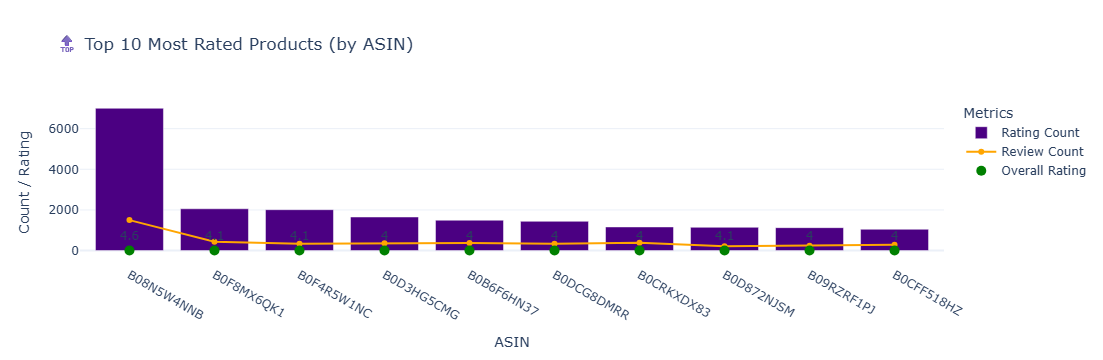

In [63]:
bar = go.Bar(x=top_10_df['ASIN'], y=top_10_df['Rating Count'], name='Rating Count', marker_color='indigo')

line = go.Scatter(x=top_10_df['ASIN'], y=top_10_df['Review Count'], name='Review Count', mode='lines+markers', line=dict(color='orange'))

scatter = go.Scatter(x=top_10_df['ASIN'], y=top_10_df['Overall Rating'], name='Overall Rating', mode='markers+text',
                     marker=dict(color='green', size=10), text=top_10_df['Overall Rating'], textposition="top center")

fig = go.Figure(data=[bar, line, scatter])
fig.update_layout(
    title='🔝 Top 10 Most Rated Products (by ASIN)',
    xaxis_title='ASIN',
    yaxis_title='Count / Rating',
    legend_title='Metrics',
    template='plotly_white'
)

fig.show()

### 🔍 Insights from Top 10 Most Rated Amazon Products

#### 🥇 Dominant Performer: Apple MacBook Air (M1)

- **Product**: *Apple MacBook Air Laptop (M1, 8GB/256GB, 13.3" Retina Display)*  
- **ASIN**: B08N5W4NNB  
- **Price**: ₹54,990  
- **Rating Count**: 7004  
- **Review Count**: 1500  
- **Overall Rating**: 4.6 ⭐

✅ This product is a **clear leader** across all metrics — it has **3x more ratings** than the next highest product.

✅ Despite such high engagement, it maintains an **impressively high rating (4.6)**, showcasing strong customer satisfaction.

✅ The **massive drop** in engagement after this product highlights its **exceptional performance** — a combination of:
  - Excellent build quality and brand trust
  - Popularity due to the M1 chip's value-performance balance
  - Strong ecosystem compatibility (iPhone/iPad users)

🎯 **Conclusion**: This MacBook Air is arguably the **most successful product** in the dataset — both in **volume of user feedback** and **customer satisfaction**.


### Does Poduct Title length leads to more engagement.

In [66]:
product_df['Product Title'].head(2)

0    Lenovo V15 15.6'' FHD Laptop, 12th Gen Intel C...
1    Apple MacBook Air Laptop: Apple M1 chip, 13.3-...
Name: Product Title, dtype: object

In [67]:
product_df['Product Title_len'] = product_df['Product Title'].str.len()
product_df['Product Title_len'].head(2)

0    159
1    186
Name: Product Title_len, dtype: int64

In [68]:
product_df['Product Title_len'].min(), product_df['Product Title_len'].max()

(97, 200)

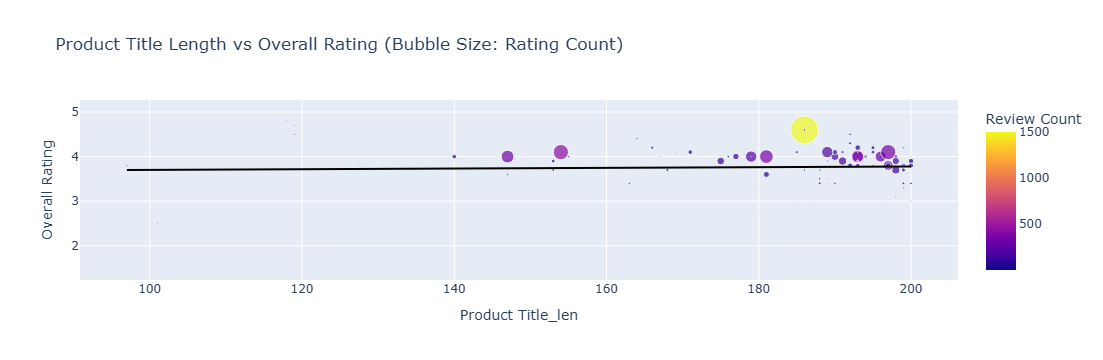

In [69]:
fig = px.scatter(
    product_df,
    x='Product Title_len',
    y='Overall Rating',
    size='Rating Count',
    color='Review Count',
    title='Product Title Length vs Overall Rating (Bubble Size: Rating Count)',
    trendline='ols',
    trendline_color_override='black'
)

fig.show()

## 📉 Insight: Description Length vs Overall Rating

The **R² value of 0.000858** indicates **almost no correlation** between the length of the product title (description) and the overall customer rating.

This suggests that **making the title longer or more detailed does not influence how highly customers rate the product**. It may be more effective to focus on product quality, brand reputation, and service rather than overly descriptive titles.


### Avg Overall Rating by Manufacturer & Price Range

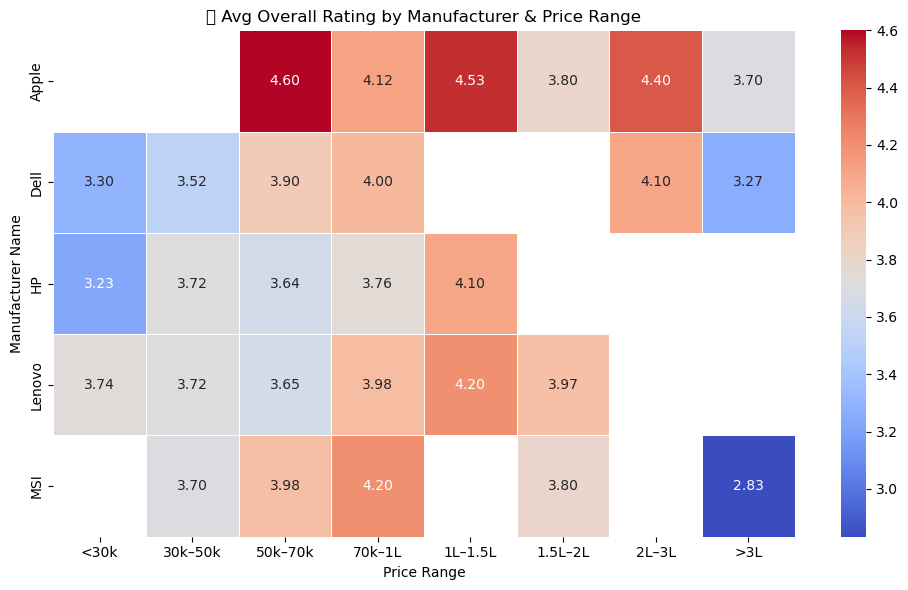

In [72]:
pivot_rating = product_df.groupby(['Manufacturer Name', 'Price Range'])['Overall Rating'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_rating, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Avg Overall Rating by Manufacturer & Price Range")
plt.xlabel("Price Range")
plt.ylabel("Manufacturer Name")
plt.tight_layout()
plt.show()

🧠 Insight: How Brand Rating Varies Across Price Segments
Apple maintains high average ratings (4.1–4.6) in all mid-to-premium segments (₹50k–₹2L), signaling consistent quality perception across price bands. Slight dip in ultra-premium (>₹3L) suggests growing expectations at top tier.

Dell improves steadily with price: from 3.3 (<₹30k) to 4.1 (₹2L–₹3L), showing better satisfaction at higher-end models. However, it drops again in >₹3L (3.26), likely due to unmet premium expectations.

HP and Lenovo peak around ₹70k–₹1.5L with ratings close to 4+, confirming these are their sweet spots for value and customer satisfaction.

MSI performs best in ₹70k–₹1L (4.2) but dips drastically in >₹3L (2.83) — possible issues with premium product satisfaction or niche targeting.

### Total Review and Rating Count by Manufacturer & Price Range

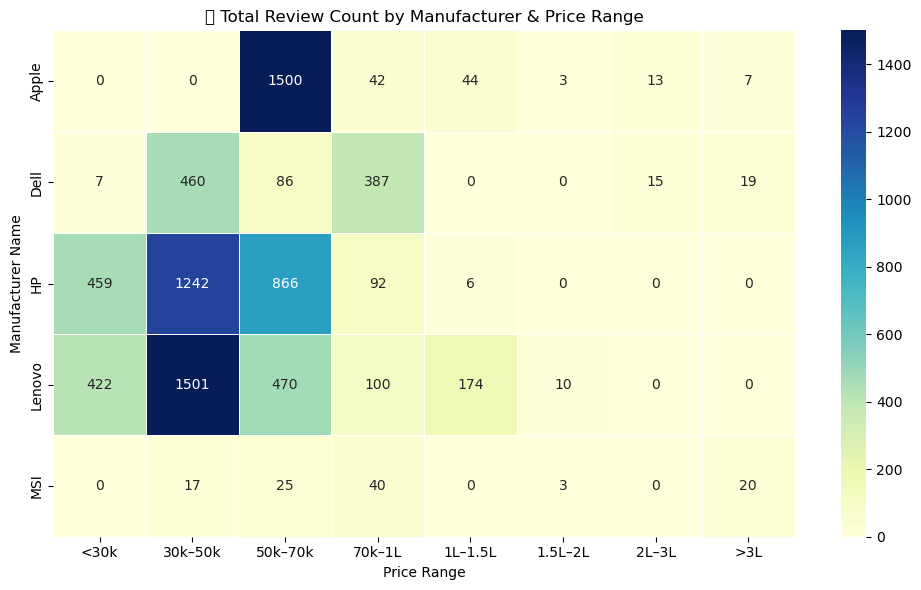

In [75]:
pivot_total_review = product_df.groupby(['Manufacturer Name', 'Price Range'])['Review Count'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_total_review, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=0.5)
plt.title("📊 Total Review Count by Manufacturer & Price Range")
plt.xlabel("Price Range")
plt.ylabel("Manufacturer Name")
plt.tight_layout()
plt.show()

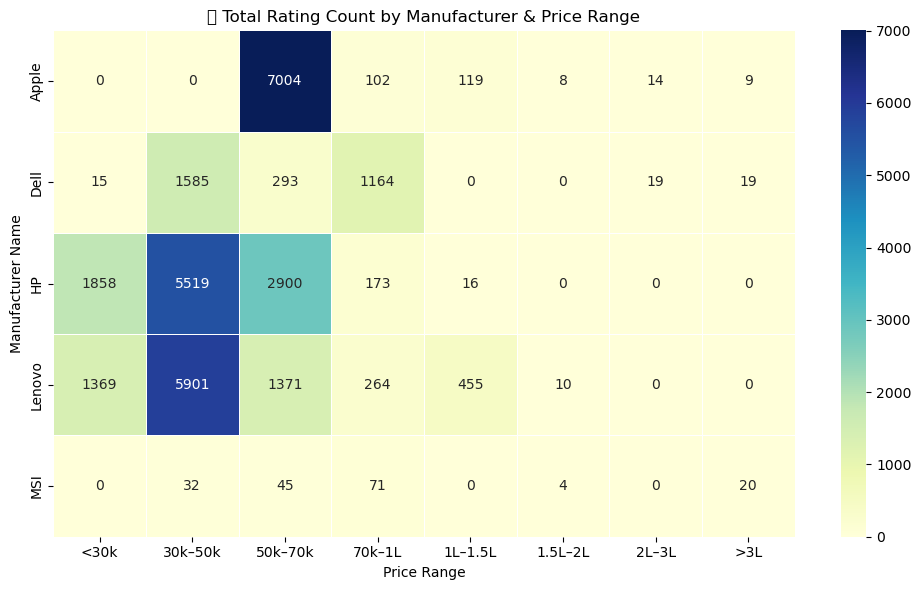

In [76]:
pivot_total_rating = product_df.groupby(['Manufacturer Name', 'Price Range'])['Rating Count'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_total_rating, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=0.5)
plt.title("📊 Total Rating Count by Manufacturer & Price Range")
plt.xlabel("Price Range")
plt.ylabel("Manufacturer Name")
plt.tight_layout()
plt.show()

💡 Insight: Manufacturer-wise Focus Across Price Ranges (based on Rating Count)
Apple has a strong dominance in the ₹50k–₹70k price range with 7,004 ratings, while maintaining minimal presence in other segments. This suggests a premium mid-range focus.

HP and Lenovo show a diverse product distribution, but:

HP leads in the ₹30k–₹50k segment with 5,519 ratings, followed by <₹30k (1,858) and ₹50k–₹70k (2,900) — indicating strength in budget to mid-range laptops.

Lenovo performs consistently in ₹30k–₹50k (5,901) and <₹30k (1,369), with additional traction in ₹1L–₹1.5L (455) — pointing to broad market targeting.

Dell shows relatively balanced distribution, with major ratings in ₹30k–₹50k (1,585) and ₹70k–₹1L (1,164) — suggesting presence in both lower and upper-mid segments.

MSI has limited but high-end presence, with peaks in ₹70k–₹1L and >₹3L — reinforcing its gaming/performance-focused portfolio.

### Total Review and Rating Count by Manufacturer & Rating Range

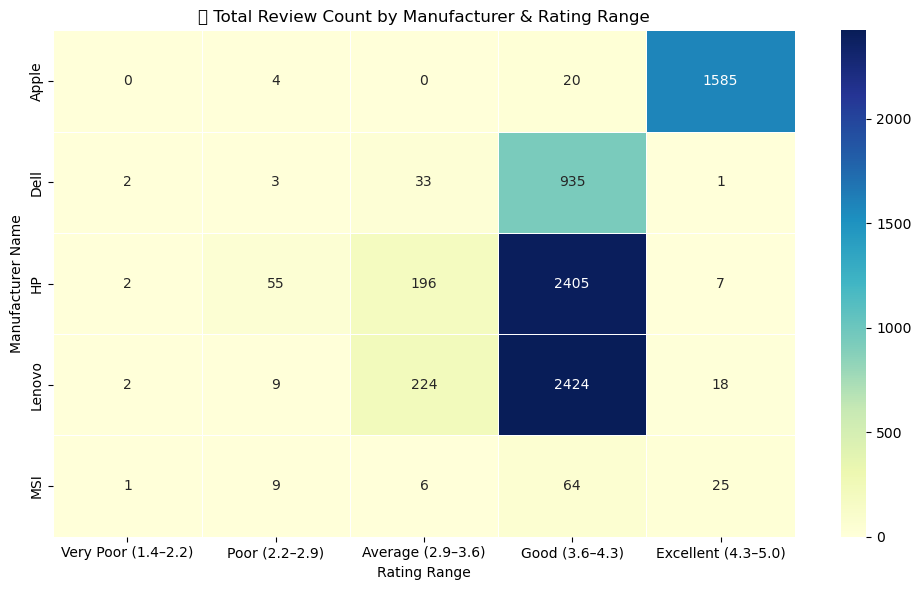

In [79]:
pivot_total_review = product_df.groupby(['Manufacturer Name', 'Rating Range'])['Review Count'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_total_review, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=0.5)
plt.title("📊 Total Review Count by Manufacturer & Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Manufacturer Name")
plt.tight_layout()
plt.show()

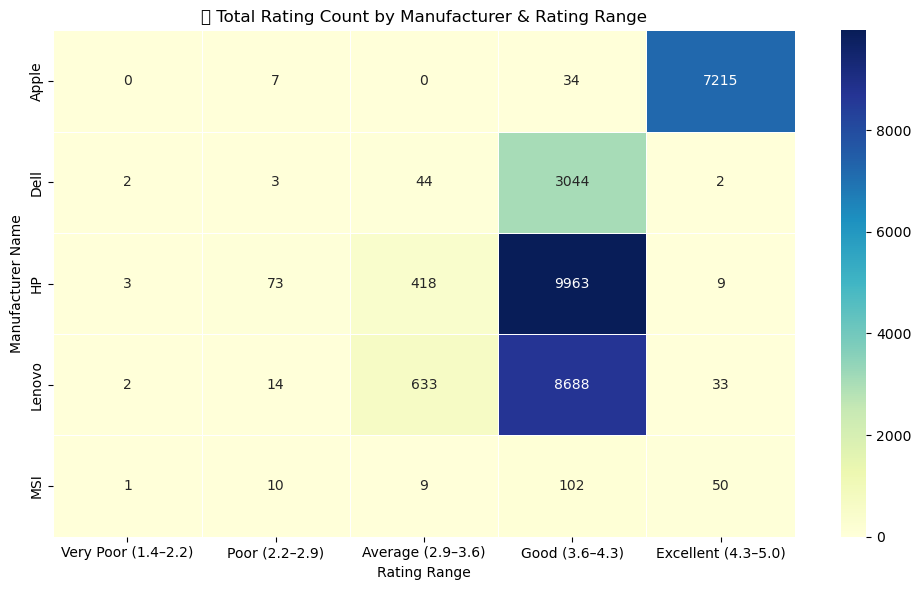

In [80]:
pivot_total_rating = product_df.groupby(['Manufacturer Name', 'Rating Range'])['Rating Count'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_total_rating, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=0.5)
plt.title("📊 Total Rating Count by Manufacturer & Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Manufacturer Name")
plt.tight_layout()
plt.show()

💡 Insight: Manufacturer-wise Performance by Customer Ratings
Apple dominates the "Excellent (4.3–5.0)" rating range with 7,215 ratings, showing outstanding customer satisfaction and a strong premium brand image. Minimal presence in other bands reinforces this.

HP and Lenovo have broad rating distributions:

HP stands out with 9,963 ratings in "Good (3.6–4.3)", followed by 418 in "Average", showing a reliable but not premium experience.

Lenovo has 8,688 ratings in "Good", with significant 633 in "Average" — indicating mixed perceptions, possibly due to wider product variety.

Dell shows strong presence in "Good" (3,044) but almost none in the "Excellent" category (only 2 ratings), suggesting customer satisfaction may be lower despite product reach.

MSI, though niche, has 50 ratings in "Excellent" and 102 in "Good", which implies positive reception among a smaller customer base, possibly in gaming or performance-heavy segments.

### Product Count by Manufacturer and Price Segment

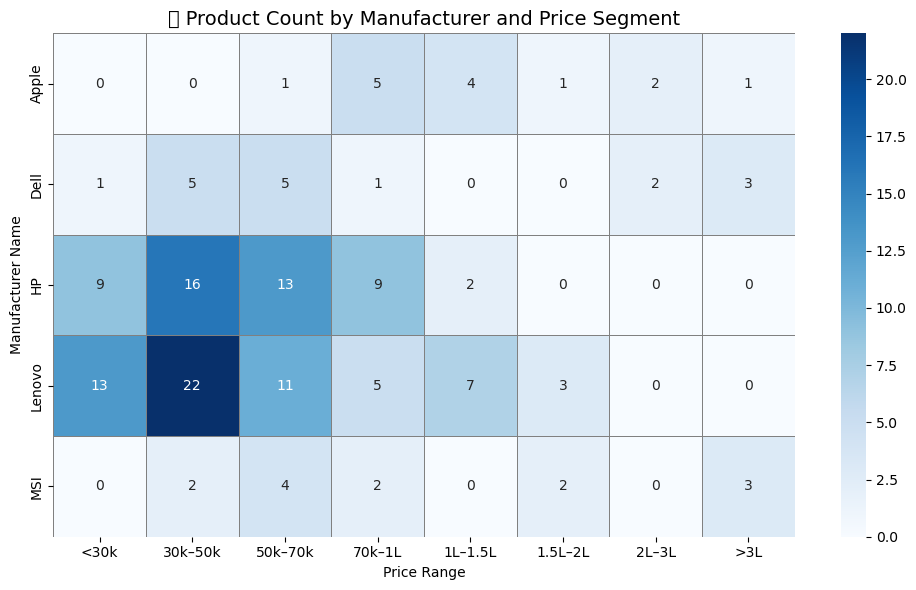

In [83]:
count_df = product_df.groupby(['Manufacturer Name', 'Price Range']).size().reset_index(name='Count')

heatmap_data = count_df.pivot(index='Manufacturer Name', columns='Price Range', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues', linewidths=0.5, linecolor='gray')

plt.title('📊 Product Count by Manufacturer and Price Segment', fontsize=14)
plt.xlabel('Price Range')
plt.ylabel('Manufacturer Name')
plt.tight_layout()
plt.show()

🔍 Insight: Product Spread Across Price Segments
Lenovo stands out with broadest coverage — it offers products in every price range from <₹30k up to ₹1.5L, with peak variety in ₹30k–50k (22 products). This suggests a diversified portfolio catering to both budget and mid-range markets.

HP also has a strong presence in budget and mid-range, especially ₹30k–50k (16 products) and <₹30k (9 products), reflecting a value-oriented product strategy.

Dell’s product range is somewhat balanced, with decent presence in <₹30k to >₹3L, though ₹30k–70k is its core focus (10 products), hinting at a mid-range tilt.

Apple’s product count is concentrated in premium bands — with no products below ₹50k, and most items in ₹70k–1.5L (10 products combined). This clearly reflects a premium brand strategy.

MSI, a known gaming brand, has limited but targeted presence — with products mainly in ₹50k–1L and >₹3L, reinforcing its performance-focused niche.

### Product Count by Manufacturer and Rating Segment

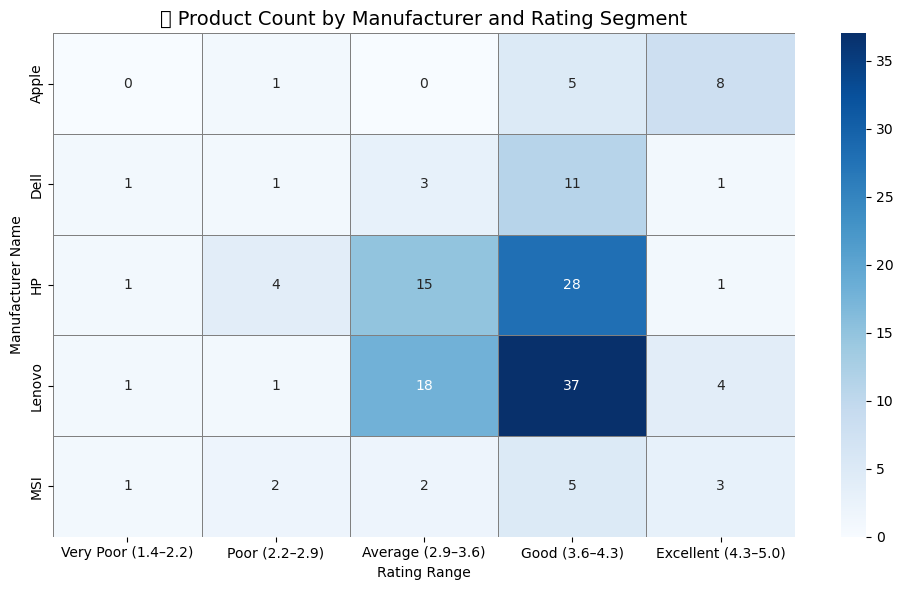

In [86]:
count_df = product_df.groupby(['Manufacturer Name', 'Rating Range']).size().reset_index(name='Count')

heatmap_data = count_df.pivot(index='Manufacturer Name', columns='Rating Range', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues', linewidths=0.5, linecolor='gray')

plt.title('📊 Product Count by Manufacturer and Rating Segment', fontsize=14)
plt.xlabel('Rating Range')
plt.ylabel('Manufacturer Name')
plt.tight_layout()
plt.show()

🔍 Insight: Product Rating Distribution by Brand
Lenovo leads with highest count of well-rated products, with 37 products rated “Good (3.6–4.3)” and 4 rated “Excellent (4.3–5.0)”. This suggests consistent quality and customer satisfaction across a broad lineup.

HP follows closely with 28 “Good” and 15 “Average” rated products, showing reliability across mid-tier products, but has only 1 “Excellent” product, indicating room for improvement at the premium level.

Apple, although limited in product variety, has the highest proportion of top-rated items — 8 out of 14 products (57%) rated “Excellent”. This reinforces Apple’s strong premium reputation, despite lower variety.

Dell shows a mixed performance, with most products rated “Good” (11), but also scattered ratings across all categories, including 1 “Very Poor”. This indicates inconsistent customer experience.

MSI, focused on niche/gaming users, has a balanced but small lineup, with 3 “Excellent” and 5 “Good” rated products, suggesting strong performance in select segments.

### Top Product by Rating Count in Each Price Range

In [89]:
temp_df = pd.DataFrame()

for rng in product_df['Price Range'].dropna().unique():
    temp = product_df[product_df['Price Range'] == rng] \
        .sort_values(by=['Rating Count', 'Review Count', 'Overall Rating'], ascending=[False, False, False]) \
        .head(1)
    temp_df = pd.concat([temp_df, temp], ignore_index=True)

temp_df[['ASIN','Price Range', 'Rating Count', 'Review Count', 'Overall Rating']]

ASIN Price Range  Rating Count  Review Count  Overall Rating
0  B0F8MX6QK1     30k–50k          2057           431             4.1
1  B08N5W4NNB     50k–70k          7004          1500             4.6
2  B0D3HG5CMG        <30k          1653           355             4.0
3  B0CD7GZD42         >3L            12            12             3.7
4  B0CRKXDX83      70k–1L          1164           387             4.0
5  B0CYLXD4K5       2L–3L            17            14             3.2
6  B0DLHGCDH3     1.5L–2L             8             3             3.8
7  B0CX8PHK2P     1L–1.5L           238            76             4.1

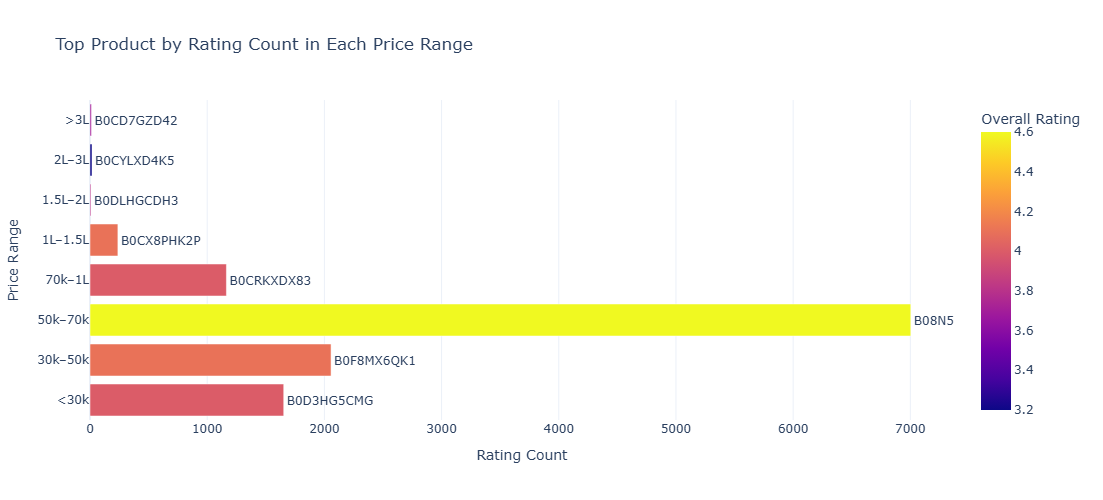

In [90]:
ordered_ranges = ['<30k', '30k–50k', '50k–70k', '70k–1L', '1L–1.5L', '1.5L–2L', '2L–3L', '>3L']
temp_df['Price Range'] = pd.Categorical(temp_df['Price Range'], categories=ordered_ranges, ordered=True)

temp_df = temp_df.sort_values('Price Range')

fig = px.bar(
    temp_df,
    x='Rating Count',
    y='Price Range',
    orientation='h',
    color='Overall Rating',
    hover_data=['ASIN', 'Review Count', 'Overall Rating'],
    text='ASIN',
    title='Top Product by Rating Count in Each Price Range'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Rating Count',
    yaxis_title='Price Range',
    yaxis=dict(categoryorder='array', categoryarray=ordered_ranges),
    template='plotly_white',
    height=500
)

fig.show()

### Distribution of Product Bought Last Month by Price Range

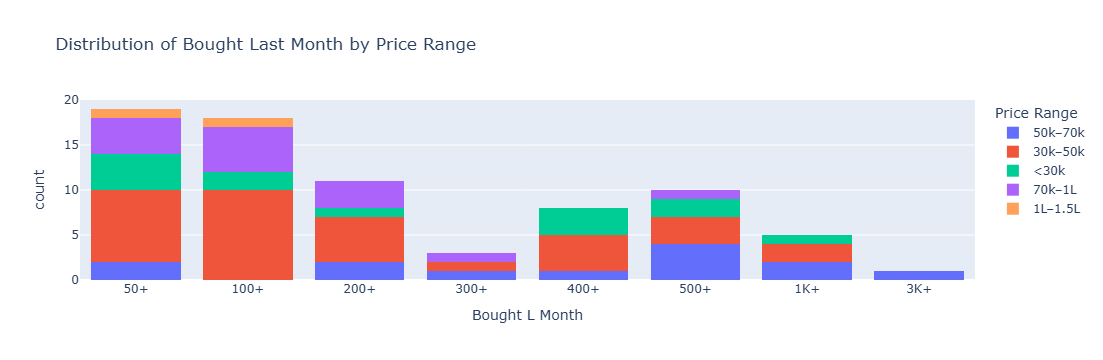

In [92]:
custom_order = ['50+', '100+', '200+', '300+', '400+', '500+', '1K+', '3K+']

filtered_df = product_df[product_df['Bought L Month'].isin(custom_order)].copy()

filtered_df['Bought L Month'] = pd.Categorical(
    filtered_df['Bought L Month'],
    categories=custom_order,
    ordered=True
)

fig = px.histogram(
    filtered_df,
    x='Bought L Month',
    color='Price Range',
    barmode='stack',
    title='Distribution of Bought Last Month by Price Range',
    category_orders={'Bought L Month': custom_order}
)
fig.show()

### Top Product by Rating Count in Each Bought Last Month Category

In [94]:
top_bought_df = pd.DataFrame()

for cat in product_df['Bought L Month'].dropna().unique():
    temp = product_df[product_df['Bought L Month'] == cat] \
        .sort_values(by=['Rating Count', 'Review Count', 'Overall Rating'], ascending=[False, False, False]) \
        .head(1)
    top_bought_df = pd.concat([top_bought_df, temp], ignore_index=True)

top_bought_df[['ASIN','Bought L Month', 'Rating Count', 'Review Count']]

ASIN Bought L Month  Rating Count  Review Count
0  B08N5W4NNB            3K+          7004          1500
1  B09RZRF1PJ           200+          1128           234
2  B0F8MX6QK1           400+          2057           431
3  B0B6F6HN37            50+          1495           370
4  B0F4R5W1NC           100+          2012           338
5  B0C3RF3HT3           500+           235            90
6  B0D3HG5CMG            1K+          1653           355
7  B0DPQG53ZR           300+           102            56

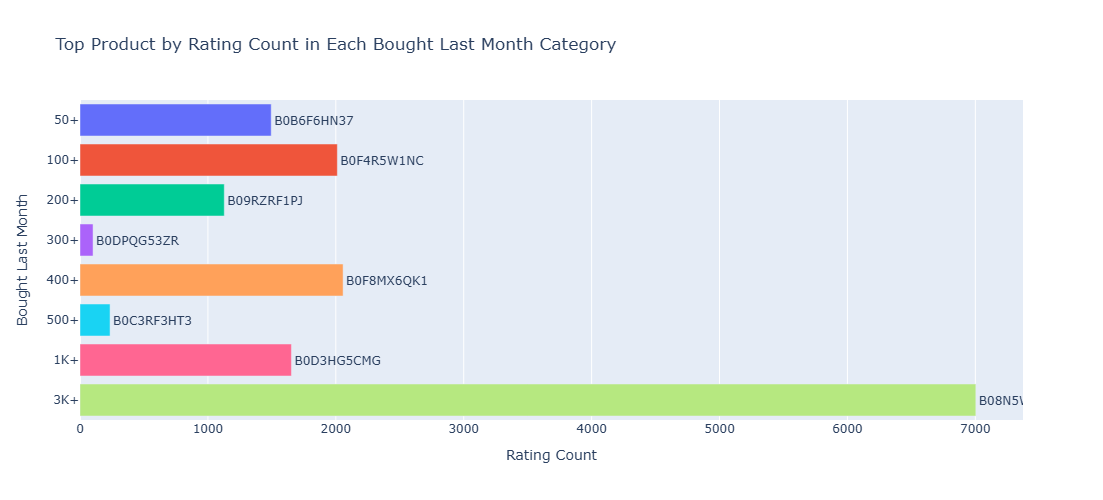

In [95]:
cat_order = ['50+', '100+', '200+', '300+', '400+', '500+', '1K+', '3K+']
top_bought_df['Bought L Month'] = pd.Categorical(top_bought_df['Bought L Month'], categories=cat_order, ordered=True)

fig = px.bar(
    top_bought_df.sort_values('Bought L Month'),
    y='Bought L Month',
    x='Rating Count',
    text='ASIN',
    title='Top Product by Rating Count in Each Bought Last Month Category',
    color='Bought L Month',
    orientation='h'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title='Bought Last Month',
    xaxis_title='Rating Count',
    showlegend=False,
    height=500
)
fig.show()


### Top Product by Rating Count in Each Rating Range

In [97]:
temp_df = pd.DataFrame()

for rng in product_df['Rating Range'].dropna().unique():
    temp = product_df[product_df['Rating Range'] == rng] \
        .sort_values(by=['Rating Count', 'Review Count'], ascending=[False, False]) \
        .head(1)
    temp_df = pd.concat([temp_df, temp], ignore_index=True)

temp_df[['ASIN','Rating Range', 'Rating Count', 'Review Count']]

ASIN         Rating Range  Rating Count  Review Count
0  B0DRCTY5JH    Average (2.9–3.6)           320            74
1  B08N5W4NNB  Excellent (4.3–5.0)          7004          1500
2  B0F8MX6QK1       Good (3.6–4.3)          2057           431
3  B0DMSNR4GG       Poor (2.2–2.9)            27            18
4  B0F6TSW761  Very Poor (1.4–2.2)             3             2

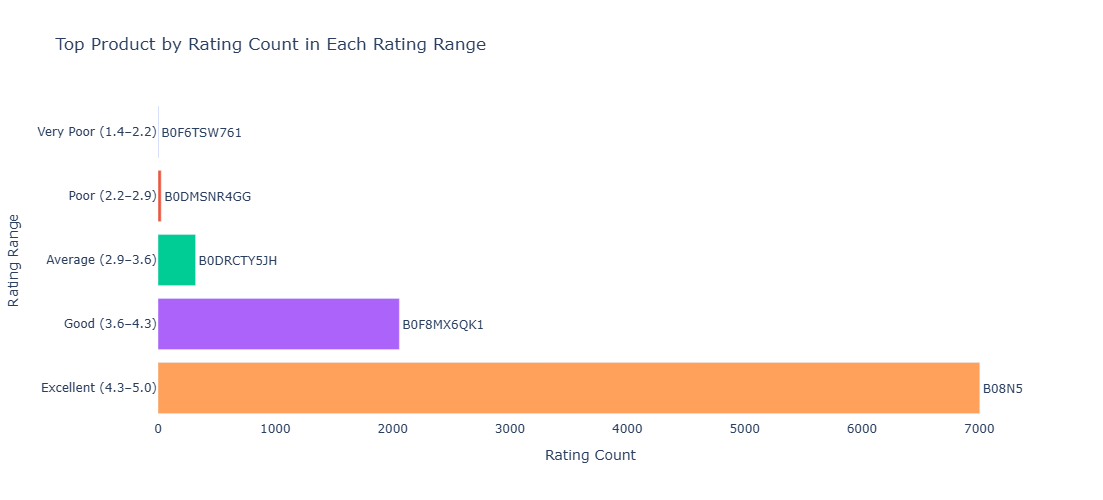

In [98]:
rating_order = ['Very Poor (1.4–2.2)', 'Poor (2.2–2.9)', 'Average (2.9–3.6)',
                'Good (3.6–4.3)', 'Excellent (4.3–5.0)']
temp_df['Rating Range'] = pd.Categorical(temp_df['Rating Range'], categories=rating_order, ordered=True)

fig = px.bar(
    temp_df.sort_values('Rating Range'),
    y='Rating Range',
    x='Rating Count',
    text='ASIN',
    title='Top Product by Rating Count in Each Rating Range',
    color='Rating Range',
    orientation='h'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title='Rating Range',
    xaxis_title='Rating Count',
    showlegend=False,
    height=500,
    plot_bgcolor='white'
)

fig.show()

### Rating Count Breakdown by Manufacturer, Price Range, and Rating Category

In [100]:
summary_df = product_df.groupby(['Manufacturer Name', 'Price Range', 'Rating Range']).agg(
    Rating_Count=('Rating Count', 'sum'),
    Product_Count=('ASIN', 'count')
).reset_index()
summary_df = summary_df[summary_df['Rating_Count'] > 0]

summary_df.head()

Manufacturer Name Price Range         Rating Range  Rating_Count  \
14             Apple     50k–70k  Excellent (4.3–5.0)          7004   
16             Apple      70k–1L       Poor (2.2–2.9)             7   
18             Apple      70k–1L       Good (3.6–4.3)             7   
19             Apple      70k–1L  Excellent (4.3–5.0)            88   
23             Apple     1L–1.5L       Good (3.6–4.3)             6   

    Product_Count  
14              1  
16              1  
18              1  
19              3  
23              1

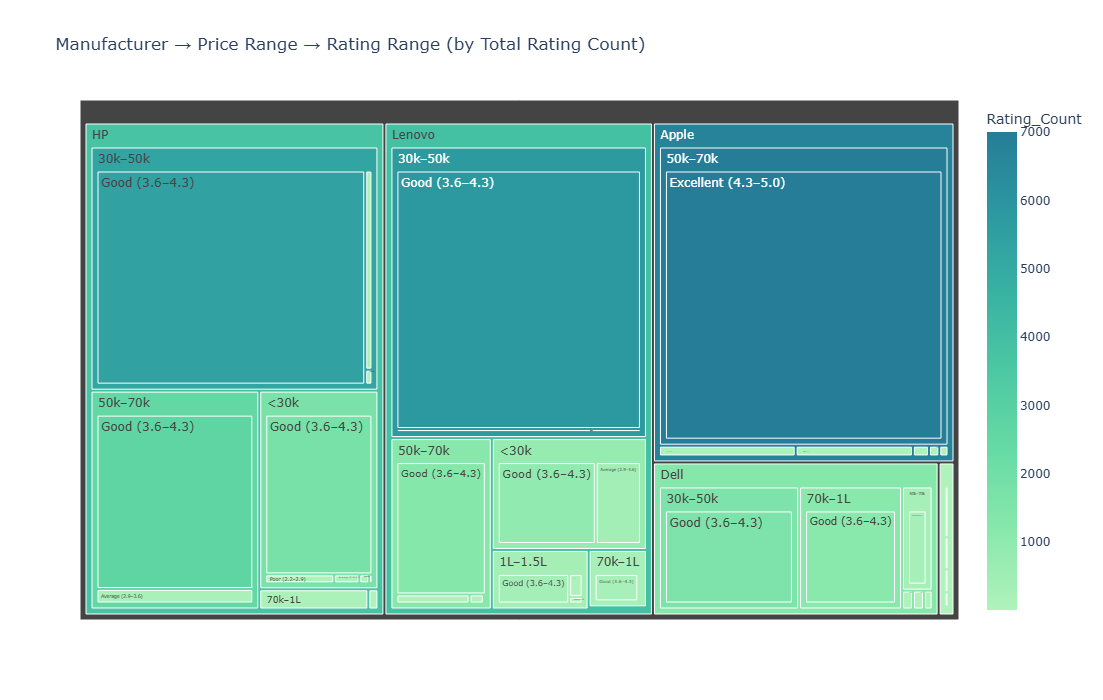

In [101]:
import plotly.express as px

fig = px.treemap(
    summary_df,
    path=['Manufacturer Name', 'Price Range', 'Rating Range'],
    values='Rating_Count',
    title='Manufacturer → Price Range → Rating Range (by Total Rating Count)',
    color='Rating_Count',
    color_continuous_scale='Tealgrn',
    hover_data={
        'Product_Count': True,
        'Rating_Count': True
    }
)

fig.update_layout(
    width=1000,
    height=700
)

fig.show()


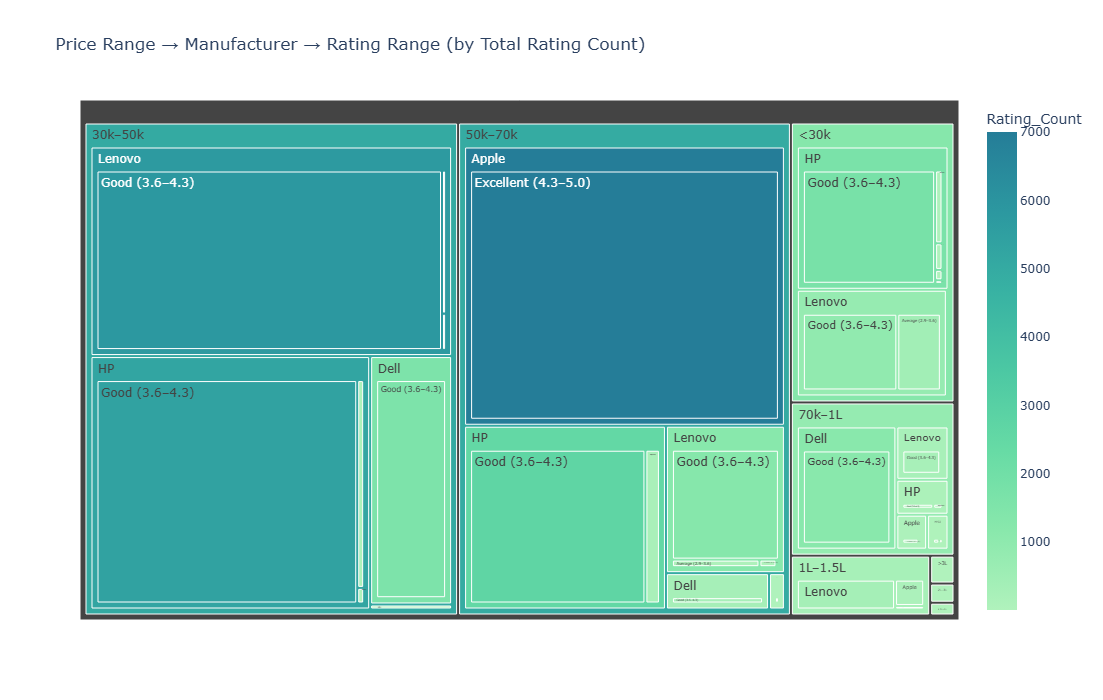

In [102]:
import plotly.express as px

fig = px.treemap(
    summary_df,
    path=['Price Range', 'Manufacturer Name', 'Rating Range'],
    values='Rating_Count',
    title='Price Range → Manufacturer → Rating Range (by Total Rating Count)',
    color='Rating_Count',
    color_continuous_scale='Tealgrn',
    hover_data={
        'Product_Count': True,
        'Rating_Count': True
    }
)

fig.update_layout(
    width=1000,
    height=700
)

fig.show()


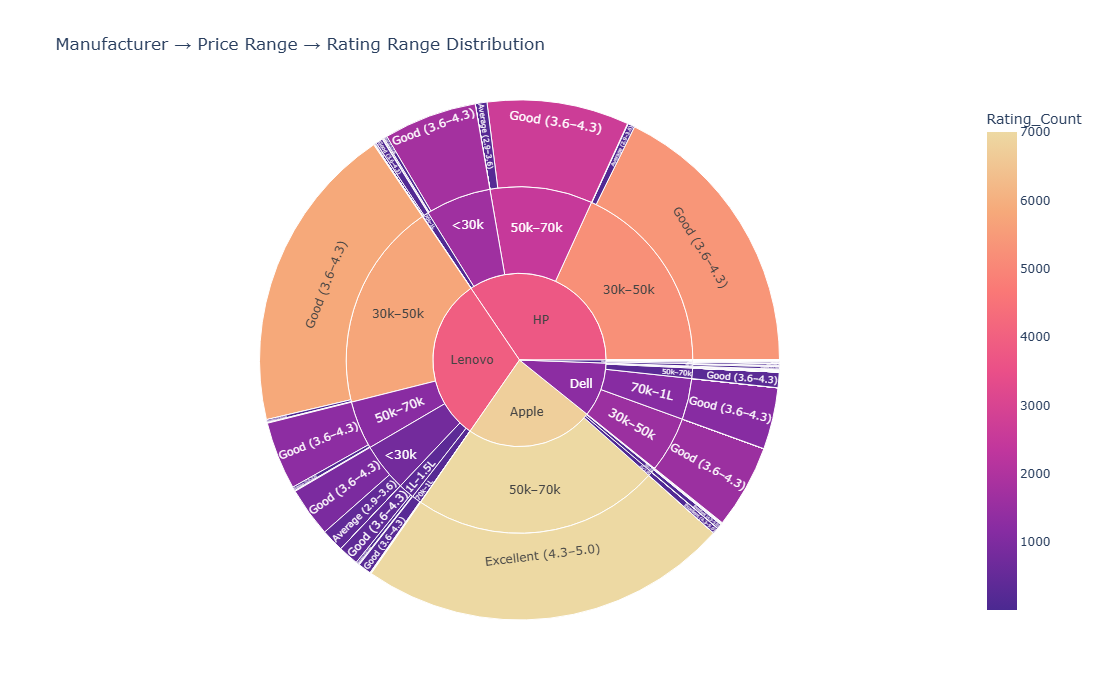

In [103]:
fig = px.sunburst(
    summary_df,
    path=['Manufacturer Name', 'Price Range', 'Rating Range'],
    values='Rating_Count',
    title='Manufacturer → Price Range → Rating Range Distribution',
    color='Rating_Count',
    color_continuous_scale='Agsunset',
    hover_data={
        'Product_Count': True,
        'Rating_Count': True
    }
)
fig.update_layout(
    width=1000,
    height=700
)
fig.show()


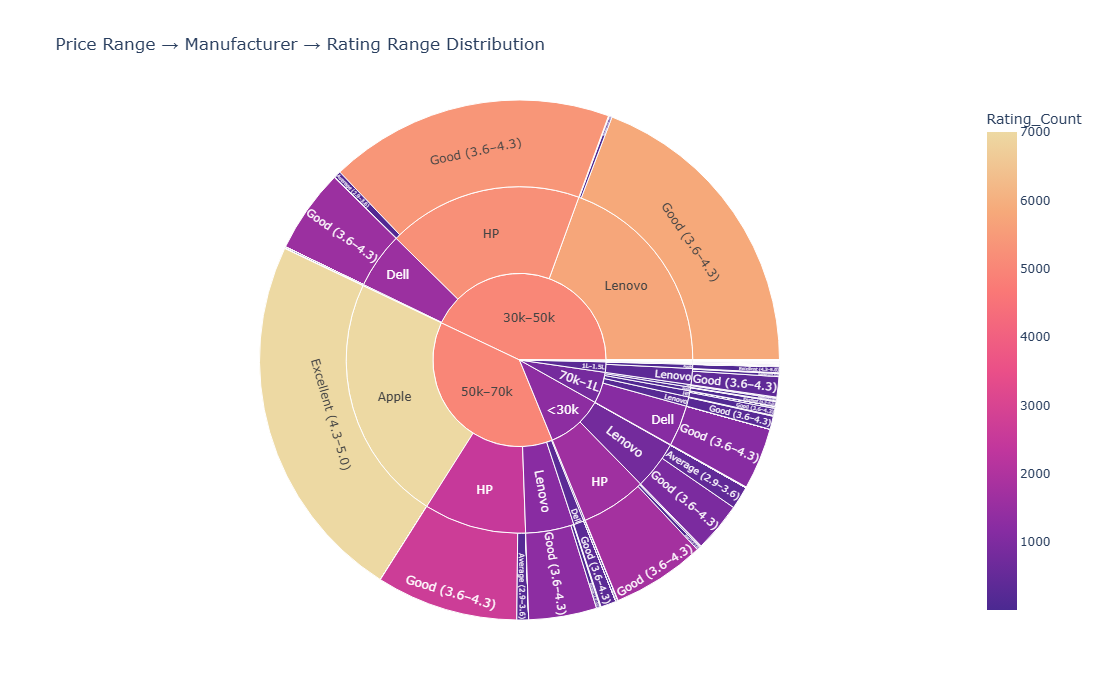

In [104]:
fig = px.sunburst(
    summary_df,
    path=['Price Range', 'Manufacturer Name', 'Rating Range'],
    values='Rating_Count',
    title='Price Range → Manufacturer → Rating Range Distribution',
    color='Rating_Count',
    color_continuous_scale='Agsunset',
    hover_data={
        'Product_Count': True,
        'Rating_Count': True
    }
)

fig.update_layout(
    width=1000,
    height=700
)

fig.show()


# 💡 Key Insights from Laptop Ratings & Pricing Analysis

---

## 🔍 1. Dominance of Specific Brands in Certain Price Segments

**Insight:**  
- **Apple** overwhelmingly dominates the **₹50k–₹70k** segment with **7,004+ ratings** and **1,500+ reviews**, despite being **absent in lower price segments**.  
- **HP** and **Lenovo** have a **wider price spread** but dominate the **₹30k–₹50k** band, which sees the **highest overall review and rating volume** across brands.  
- **Dell** has notable presence in **<₹30k** and **₹30k–₹50k**, which may be strategic but reflects **lower sentiment strength**.

---

## ⭐ 2. Rating Quality vs Quantity: The Apple Benchmark

**Insight:**  
- **Apple** has **98.5%+ ratings** in the **"Excellent"** category, with virtually **no presence in poor/average** ranges.  
- In contrast, **Dell** and **HP** show concerning levels of **average and poor ratings** (e.g., HP: 418 average, 73 poor).  
- **Lenovo** shows a high count in **“Good”** (8,688) and some **average** ratings (633), suggesting a **balanced customer experience**.

---

## 🧭 3. The Price Band Saturation Insight

**Insight:**  
- Rating and review volume **drops sharply after ₹70k**.  
- **Apple** and **MSI** are the **only brands** with significant activity **above ₹1.5L**.  
- **Lenovo** and **HP** are **barely present** above ₹1.5L — indicating it's **not a target segment**.  
- Most buyer activity is concentrated **below ₹70k**, especially in the **₹30k–₹50k mass-market band**.

---

## ⚠️ 4. Review-to-Rating Ratio Reveals Engagement Levels

**Insight:**  
- **Apple’s review-to-rating ratio** is approximately **21%** (1,500 reviews from 7,000+ ratings) — a sign of **high customer engagement**.  
- **HP** and **Lenovo** also show strong engagement (**~15–20%**), while **Dell** and **MSI** have **relatively lower engagement** levels.

---

## 📈 5. Product Visibility Across Price + Rating Heatmap

**Insight:**  
- In the price-rating grid heatmap:  
  - **HP** and **Lenovo** dominate **most grid cells**, showing **broad presence** across segments.  
  - **Apple** is **precise and surgical** — it targets **few price bands** but **owns them with high ratings**.  
  - **Dell** has a **scattered presence**, indicating a **lackmium price bands (**>₹1.5L**) see **sparse activity**.


# 🎯 Best Segment to Launch a New Laptop: ₹40,000–₹60,000 Price Band

---

## ✅ Why this Segment?

### 🔥 Highest Market Activity
This price range sits within the ₹30k–₹70k sweet spot, which has:
- 📊 The **highest volume of ratings and reviews**
- 💬 **Strong customer engagement**
- 👥 A healthy mix of **students, office workers, and casual users**

---

### 🥇 Less Brand Domination
- **HP** and **Lenovo** are strong players, but:
  - **Apple** is **absent**
  - **Dell** has a **scattered presence**
- **MSI** focuses on **gaming**
- 👉 No single brand **owns the price–performance niche**, creating space for a new entrant

---

### 💬 Rich Review Patterns
- Ratings in this band show a **wide spread**:
  - Many products are stuck in the **"Good" or "Average"** category
- ✅ Opportunity to **outperform with better build quality**, support, and battery life

---

### 🎓 Target Audience is Broad
Includes:
- 🧑‍🎓 **Students** and **parents** shopping for college
- 👩‍💻 **Freshers/employees** needing a WFH laptop
- 🏠 **Casual home users** (media, browsing, office tasks)

---

## 🧩 Ideal Product Profile for ₹40k–₹60k Segment

| **Feature**   | **Recommended Spec** |
|---------------|-----------------------|
| **Processor** | Intel i5 12th Gen / Ryzen 5 5500U or better |
| **RAM**       | 16 GB (don’t go with 8GB unless expandable) |
| **Storage**   | 512 GB SSD |
| **Display**   | 15.6” FHD IPS, 250+ nits brightness |
| **Battery**   | 6+ hours real backup |
| **Build**     | Clean, minimal design, non-plastic feel |
| **Weight**    | <1.8kg preferred |
| **Warranty**  | 1 year + onsite support / extendable |
| **Extras**    | Backlit keyboard, good touchpad, USB-C |

---

## 📈 Launch Strategy

### 🔍 Keywords and Title Optimization
- Focus on:  
  **"student laptop"**, **"work from home"**, **"multitasking"**, **"value for money laptop"**

---

### 🎁 Bundle Smartly
Launch with accessory combos like:
- Laptop bag  
- Wireless mouse  
- Extended warranty  

➡️ Increases **perceived value** without significantly increasing cost

---

### 🌟 Get Early Positive Reviews
- Use **Amazon Vine program** (if eligible)
- Offer **discounts to early buyers**
- Use **follow-up emails** or messages requesting genuine feedback

---

### 💸 Competitive Price Point
- Launch at **₹48,999–₹54,999**
- Use sales and coupons to bring it down to **~₹45,000**

---

### 📣 Positioning
- Highlight:
  - ⚡ **Speed**
  - 🔄 **Multitasking**
  - 💼 **Lightweight design**
  - 🔋 **Battery life**

These are **key decision drivers** for this customer segment.
